# Project 2 - Income Qualification (New)

SUBMITTED BY: YANDA SEBEGA

DATE: 17-SEP-2021

CLASS: MACHINE LEARNING


# Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel
%matplotlib inline


# Reading the data

In [2]:
# Read the data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [3]:
# Basic exploratory data analysis
print(df_train.shape)
print(df_test.shape)

(9557, 143)
(23856, 142)


# Actions to perform

#### 1. Identify the output variable
The output variable is the variable that would be in the train but absent in the test set.

In [4]:
# Output variable column.
list(set(df_train.columns) - set(df_test.columns))


['Target']

In [5]:
# Check the number of instances per category.
df_train['Target'].value_counts()


4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

#### 2. Understand the type of data

In [6]:
df_train.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [7]:
df_test.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

The dataset has columns of types object, int64, and float64.

Let's get a sense what the data look like by using the select_dtypes method from pandas.

In [8]:
df_train.select_dtypes(include='object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [9]:
df_test.select_dtypes(include='object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_2f6873615,72958b30c,.5,no,17
1,ID_1c78846d2,72958b30c,.5,no,17
2,ID_e5442cf6a,72958b30c,.5,no,17
3,ID_a8db26a79,5b598fbc9,no,16,no
4,ID_a62966799,1e2fc704e,8,no,11


In [10]:
df_train.select_dtypes(include='float64').head()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,NaN,NaN,10.0,1.000000,1.000000,0.0,100.0
1,135000.0,1.0,NaN,12.0,1.000000,1.000000,64.0,144.0
2,NaN,NaN,NaN,11.0,0.500000,0.250000,64.0,121.0
3,180000.0,1.0,1.0,11.0,1.333333,1.777778,1.0,121.0
4,180000.0,1.0,NaN,11.0,1.333333,1.777778,1.0,121.0


In [11]:
df_test.select_dtypes(include='float64').head()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,NaN,NaN,NaN,16.5,1.5,2.25,0.25,272.25
1,NaN,NaN,NaN,16.5,1.5,2.25,0.25,272.25
2,NaN,NaN,NaN,16.5,1.5,2.25,0.25,272.25
3,NaN,1.0,NaN,16.0,1.0,1.00,0.00,256.00
4,175000.0,1.0,NaN,NaN,0.5,0.25,64.00,NaN


In [12]:
df_train.select_dtypes(include='int64').head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,...,1,0,43,100,1849,1,100,0,1849,4
1,0,4,0,1,1,1,0,1,1,0,...,1,0,67,144,4489,1,144,0,4489,4
2,0,8,0,1,1,0,0,0,0,0,...,1,0,92,121,8464,1,0,0,8464,4
3,0,5,0,1,1,1,0,2,2,1,...,1,0,17,81,289,16,121,4,289,4
4,0,5,0,1,1,1,0,2,2,1,...,1,0,37,121,1369,16,121,4,1369,4


In [13]:
df_test.select_dtypes(include='int64').head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,agesq
0,0,5,0,1,1,0,1,1,2,0,...,0,1,0,4,0,16,9,0,1,16
1,0,5,0,1,1,0,1,1,2,0,...,0,1,0,41,256,1681,9,0,1,1681
2,0,5,0,1,1,0,1,1,2,0,...,0,1,0,41,289,1681,9,0,1,1681
3,0,14,0,1,1,1,0,1,1,0,...,0,1,0,59,256,3481,1,256,0,3481
4,0,4,0,1,1,1,0,0,0,0,...,0,1,0,18,121,324,1,0,1,324


#### 3. Check if there are any biases in your dataset.

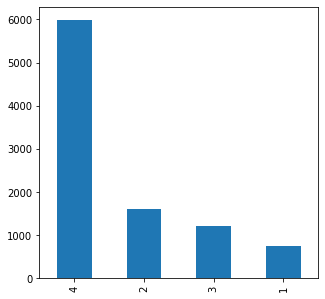

In [14]:
# Using the target variable, let's plot the data and see if there is a normal distribution.
df_train['Target'].value_counts().plot.bar(figsize=(5,5))

As we can see, the dataset a right-skewed, hence bias.

#### 4. Check whether all members of the house have the same poverty level.

In [15]:
df_train.groupby('idhogar')['Target'].nunique()

idhogar
001ff74ca    1
003123ec2    1
004616164    1
004983866    1
005905417    1
            ..
ff9343a35    1
ff9d5ab17    1
ffae4a097    1
ffe90d46f    1
fff7d6be1    1
Name: Target, Length: 2988, dtype: int64

In [16]:
df_train.groupby(['idhogar']).size()

idhogar
001ff74ca    2
003123ec2    4
004616164    2
004983866    2
005905417    3
            ..
ff9343a35    4
ff9d5ab17    3
ffae4a097    2
ffe90d46f    4
fff7d6be1    4
Length: 2988, dtype: int64

In [17]:
df_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [18]:
df_train[df_train['parentesco1']==1][['Id', 'idhogar', 'Target']].head()

,Id,idhogar,Target
0,ID_279628684,21eb7fcc1,4
1,ID_f29eb3ddd,0e5d7a658,4
2,ID_68de51c94,2c7317ea8,4
5,ID_ec05b1a7b,2b58d945f,4
8,ID_1284f8aad,d6dae86b7,4


#### 5. Check if there is a house without a family head.
From the dictionary line 84. parentesco1, =1 if household head

In [19]:
df_train.parentesco1.value_counts()

0    6584
1    2973
Name: parentesco1, dtype: int64

In [20]:
households = df_train.groupby('idhogar')['parentesco1'].sum()
# Households without head...
len(households[households == 0])

15

#### 6. Set the poverty level of the members and the head of the house same in a family.

In [21]:
equal_target = df_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print(len(equal_target))
# Households where targets are not all equal
not_equal_target = equal_target[equal_target != True]
print(len(not_equal_target))

2988
85


In [22]:
for household in not_equal_target.index:
    # retrieve the correct label for the head of household
    target = int(df_train[(df_train['idhogar'] == household) & (df_train['parentesco1'] == 1.0)]['Target'])
    
    # Set the correct label for all the members in that specific household
    df_train.loc[df_train['idhogar'] == household, 'Target'] = target

#### 7. Count how many null values are existing in columns.

In [23]:
null_values = df_train.isnull().sum()

In [24]:
null_values[null_values>0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

- v2a1: Monthly rent payment
- v18q1: Number of tablets household owns
- rez_esc: Years behind in school
- meaneduc: Average years of education for adults (18+)
- SQBmeaned: Square of the mean years of education of adults


In [25]:
cols = ['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned']
df_train[cols].head()

,v2a1,v18q1,rez_esc,meaneduc,SQBmeaned
0,190000.0,NaN,NaN,10.0,100.0
1,135000.0,1.0,NaN,12.0,144.0
2,NaN,NaN,NaN,11.0,121.0
3,180000.0,1.0,1.0,11.0,121.0
4,180000.0,1.0,NaN,11.0,121.0


In [26]:
df_train[cols].tail()

,v2a1,v18q1,rez_esc,meaneduc,SQBmeaned
9552,80000.0,NaN,NaN,8.25,68.0625
9553,80000.0,NaN,NaN,8.25,68.0625
9554,80000.0,NaN,NaN,8.25,68.0625
9555,80000.0,NaN,NaN,8.25,68.0625
9556,80000.0,NaN,NaN,8.25,68.0625


#### 8. Remove null value rows of the target variable.

In [27]:
df_train["Target"].isnull().sum()

0

There is no null value in the target variable.

# Data Cleaning before random forest prediction

'v2a1', 'v18q1', 'rez_esc', 'meaneduc', and 'SQBmeaned' are the only columns with null values. 
Monthly rent payment(v2a1), Number of tablets household owns (v18q1), Years behind in school (rez_esc), Average years of education for adults (18+) (meaneduc) can easily be substituted with 0 instead of the null value. 
The Square of the mean years of education of adults (SQBmeaned) is a calculated value and can be removed as it doesn't add value to out model. This include columns 134 (SQBescolari) to 142 (agesq) which are all squared columns of the 9 different features.

In [28]:
# Drop SQB* columns...
squared_columns = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 
                   'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']
df_train.drop(columns=squared_columns, inplace=True)
df_test.drop(columns=squared_columns, inplace=True)

In [29]:
# The identifier add no value to the prediction.
id_cols = ['Id', 'idhogar']
df_train.drop(columns=id_cols, inplace=True)
df_test.drop(columns=id_cols, inplace=True)

In [30]:
# Yes and No in the dataset are converted into 0s and 1s for conformity with scikit-learn operations.
df_train.replace({'yes':1,'no':0}, inplace=True)
df_test.replace({'yes':1,'no':0}, inplace=True)

In [31]:
cols = ['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'age', 'parentesco1', 'Target']
df_train[cols].head()

,v2a1,v18q1,rez_esc,meaneduc,age,parentesco1,Target
0,190000.0,NaN,NaN,10.0,43,1,4
1,135000.0,1.0,NaN,12.0,67,1,4
2,NaN,NaN,NaN,11.0,92,1,4
3,180000.0,1.0,1.0,11.0,17,0,4
4,180000.0,1.0,NaN,11.0,37,0,4


In [32]:
# The only null values in our datasets are: 'v2a1', 'v18q1', 'rez_esc', 'meaneduc' and 'SQBmeaned'
df_train.fillna(value=0, inplace=True)
df_test.fillna(value=0, inplace=True)

In [33]:
df_train.corr()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
v2a1,1.000000,-0.025479,0.101634,-0.030867,0.018355,0.061534,0.171947,0.196293,0.017916,-0.059021,...,0.172564,-0.032538,-0.023249,-0.081278,-0.096422,-0.071141,0.148049,-0.148049,-0.090771,0.166055
hacdor,-0.025479,1.000000,-0.233369,0.652594,-0.175011,-0.101965,-0.084680,-0.077992,0.232508,0.059313,...,-0.042086,0.017444,0.025546,-0.010172,0.037182,0.005289,0.027721,-0.027721,-0.118168,-0.192052
rooms,0.101634,-0.233369,1.000000,-0.213368,0.129183,0.130531,0.254256,0.271554,-0.066578,0.267627,...,0.223771,-0.073862,-0.130994,-0.051941,-0.099481,-0.050428,0.130286,-0.130286,0.077046,0.229089
hacapo,-0.030867,0.652594,-0.213368,1.000000,-0.150986,-0.124506,-0.067529,-0.061785,0.226378,0.126645,...,-0.038896,0.023858,-0.005963,0.000737,0.023113,0.024699,0.008402,-0.008402,-0.087773,-0.137874
v14a,0.018355,-0.175011,0.129183,-0.150986,1.000000,0.143143,0.036396,0.031774,-0.054769,0.018133,...,0.027642,-0.001824,0.000709,-0.020328,-0.021421,-0.005146,-0.007297,0.007297,0.027193,0.063321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lugar6,-0.071141,0.005289,-0.050428,0.024699,-0.005146,-0.075008,-0.092596,-0.089785,0.046550,0.034428,...,-0.353624,-0.094692,-0.076397,-0.088985,-0.095339,1.000000,-0.257708,0.257708,-0.036963,-0.045880
area1,0.148049,0.027721,0.130286,0.008402,-0.007297,0.078661,0.168158,0.160112,-0.046722,-0.033211,...,0.373259,-0.079163,-0.012335,-0.199467,-0.111982,-0.257708,1.000000,-1.000000,0.026770,0.088459
area2,-0.148049,-0.027721,-0.130286,-0.008402,0.007297,-0.078661,-0.168158,-0.160112,0.046722,0.033211,...,-0.373259,0.079163,0.012335,0.199467,0.111982,0.257708,-1.000000,1.000000,-0.026770,-0.088459
age,-0.090771,-0.118168,0.077046,-0.087773,0.027193,0.029801,-0.041128,-0.043230,-0.316990,-0.020306,...,0.064751,0.003958,-0.020481,-0.022969,-0.040033,-0.036963,0.026770,-0.026770,1.000000,0.117039


#### 9. Predict the accuracy using random forest classifier.

In [34]:
X_features = df_train.iloc[:,0:-1]
y_target = df_train.iloc[:,-1]

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

x_train, x_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=0)

rfc = RandomForestClassifier(random_state=2)

In [36]:
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=2)

In [37]:
y_pred = rfc.predict(x_test)

In [437]:
accuracy_score(y_test, y_pred)

0.9492677824267782

#### 10. Check the accuracy using a random forest with cross-validation.

In [441]:
seed = 2
kfold = KFold(n_splits=5)
rfclassifier = RandomForestClassifier(n_estimators=100)
results = cross_val_score(rfclassifier, x_train, y_train, cv=kfold)
print(results)
print(results.mean())

[0.91039895 0.91628515 0.92609549 0.8999346  0.9293656 ]
0.9164159581425769


In [40]:
# Feature selection reduce the number of unncessary features.
sfm = SelectFromModel(rfclassifier).fit(x_train, y_train)

In [47]:
feature_names = np.array(x_train.columns)

In [48]:
feature_names[sfm.get_support()]

array(['v2a1', 'rooms', 'v18q', 'v18q1', 'r4h1', 'r4h2', 'r4h3', 'r4m1',
       'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3', 'tamhog', 'tamviv',
       'escolari', 'hhsize', 'paredblolad', 'paredpreb', 'pisomoscer',
       'pisocemento', 'cielorazo', 'energcocinar2', 'energcocinar3',
       'epared2', 'epared3', 'etecho2', 'etecho3', 'eviv2', 'eviv3',
       'hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total',
       'dependency', 'edjefe', 'edjefa', 'meaneduc', 'bedrooms',
       'overcrowding', 'tipovivi1', 'television', 'qmobilephone',
       'lugar1', 'area1', 'area2', 'age'], dtype=object)

In [49]:
x_train_sfm = x_train[feature_names[sfm.get_support()]]

In [51]:
# Using random forest again...with our set of newly selected features.
seed = 2
kfold = KFold(n_splits=5)
rfclassifier = RandomForestClassifier(n_estimators=100)
results = cross_val_score(rfclassifier, x_train_sfm, y_train, cv=kfold)
print(results)
print(results.mean())

[0.9352518  0.94179202 0.94637018 0.93067364 0.95421844]
0.9416612164813604


In [3]:
correlated = df_train.corr()

In [6]:
correlated=correlated.abs().unstack()

In [9]:
correlated = correlated[(correlated>=0.8) & (correlated<1)]

In [12]:
len(correlated)

66